## 데이터 클리닝 (정확성)

In [2]:
%matplotlib inline
import pandas as pd

In [50]:
df = pd.read_csv('data/beer.csv', index_col=0)
df

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
...,...,...,...,...,...,...,...
2247,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2248,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2249,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


<Axes: >

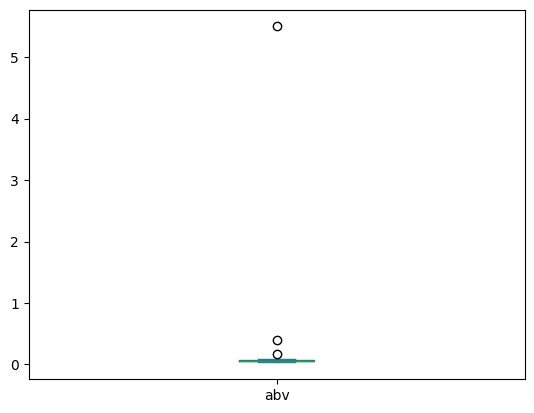

In [51]:
# 박스플롯으로 이상치 찾기
df.plot(kind='box', y='abv')

In [52]:
df['abv'].describe()

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [53]:
# 제1사분면
q1 = df['abv'].quantile(q=0.25)
# 제3사분면
q3 = df['abv'].quantile(q=0.75)

In [54]:
# IQR: 제3사분면 - 제1사분면
iqr = q3 - q1
iqr

0.015

In [55]:
# 이상치 구하기
# 제 1사분면 - IQR * 1.5 > x | 제 3사분면 + IQR * 1.5 < x
condition = (df['abv'] < q1 - iqr * 1.5) | (df['abv'] > q3 + iqr * 1.5)
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [56]:
# 이상치 값 변경
df.loc[2250, 'abv'] = 0.055

In [57]:
# 다시 이상치 구하기
condition = (df['abv'] < q1 - iqr * 1.5) | (df['abv'] > q3 + iqr * 1.5)
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [58]:
# 나머지 이상치(index) 제거
df.drop(df[condition].index, inplace=True)

<Axes: >

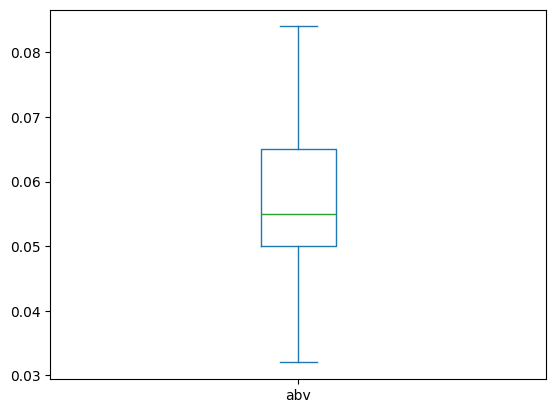

In [61]:
# 박스플롯 그리기
df.plot(kind='box', y='abv')